# Programming Drill 3.1.1 Write a program that performs our little marble experiment. The program should allow the user to enter a Boolean matrix that describes the ways that marbles move. Make sure that the matrix follows our requirement. The user should also be permitted to enter a starting state of how many marbles are on each vertex. Then the user enters how many time clicks she wants to proceed. The computer should then calculate and output the state of the system after those time clicks. We will make changes to this program later in the chapter

Yanofsky, Noson S.. Quantum Computing for Computer Scientists (p. 79). Cambridge University Press. Kindle Edition. 

This one is a bit tricky to be executed as described in the heading. But it will be nice to have interactive elements and graphs in it. So before we jump into the actual code to change the state, I will use ipywidgets and networkx to get input from the user and then render it as graph

In [107]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [108]:
def draw_graph_from_np_array(array):
    G = nx.from_numpy_matrix(array, create_using=nx.MultiDiGraph())
    G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
    G.graph['graph'] = {'scale': '3'}
    pos = nx.circular_layout(G)
    nx.draw_circular(G)
    labels = {i : i for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=15)
    plt.show()

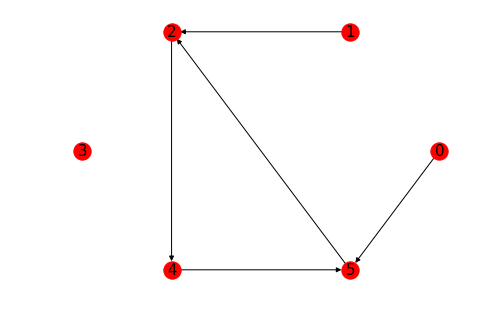

In [109]:
M = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 1],
     [0, 0, 0, 1, 0, 0],
     [0, 0, 1, 0, 0, 0],
     [1, 0, 0, 0, 1, 0]]
a = np.array(M)
# We have to make a transpose as in our case if there is a 1 at (i, j) this will mean an edge from j to i
draw_graph_from_np_array(a.transpose())

I couldn't figure out an easy way to draw self loops in networkx + matplotlib. There are some ways which use pygraphviz or similar library but I am not super familiar with them and I couldn't make them work easily

Now for the actual programming drill

In [110]:
def change_state(M, init_state, time_click):
    sums = np.sum(M, axis=0)
    if np.max(sums) > 1:
        print("The matrix does not comply to our need")
        return None
    final_matrix = matrix_power(M, time_click)
    return np.matmul(final_matrix, init_state.transpose()).transpose()

In [111]:
M = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 1],
     [0, 0, 0, 1, 0, 0],
     [0, 0, 1, 0, 0, 0],
     [1, 0, 0, 0, 1, 0]]
a = np.array(M)
init = np.array([[6, 2, 1, 5, 3, 10]])

### With one time click

In [112]:
change_state(a, init, 1).transpose()

array([[ 0],
       [ 0],
       [12],
       [ 5],
       [ 1],
       [ 9]])

In [113]:
change_state(a, np.array([[5, 5, 0, 2, 0, 15]]), 1).transpose()

array([[ 0],
       [ 0],
       [20],
       [ 2],
       [ 0],
       [ 5]])

### With two time click

In [114]:
change_state(a, init, 2).transpose()

array([[ 0],
       [ 0],
       [ 9],
       [ 5],
       [12],
       [ 1]])

### With three time clicks

In [115]:
change_state(a, init, 3).transpose()

array([[ 0],
       [ 0],
       [ 1],
       [ 5],
       [ 9],
       [12]])